In [6]:
from sklearn.cluster import KMeans
import pandas as pd
import os

In [10]:
sethdata=pd.ExcelFile(os.getcwd()+"/data/sethdata.xlsx")

In [11]:
df = sethdata.parse("synapse properties")

In [12]:
df.head()

,Block ID,Exp,Code,Condition,den#,zlength,syn_density,synapse,psd area,avg cross sec,...,synpos,ssvlog,ssv,ln sv,dsvlog,dsv,ln dsv,B_mitos,Unnamed: 21,Unnamed: 22
0,JB023D,JB023,FSBQD,LTP,fsbqd_d001,13.029467,1.074488,fsbqd_d001cfa01,0.059786,0.599449,...,inter,2.962369,917.0,6.821107,0.301030,2.0,0.693147,0.0,NaN,NaN
1,JB023D,JB023,FSBQD,LTP,fsbqd_d001,13.029467,1.074488,fsbqd_d001cfa02,0.016827,0.599449,...,inter,2.431364,270.0,5.598422,0.000000,1.0,0.000000,0.0,NaN,NaN
2,JB023D,JB023,FSBQD,LTP,fsbqd_d001,13.029467,1.074488,fsbqd_d001cfa03,0.188353,0.599449,...,inter,3.240549,1740.0,7.461640,0.954243,9.0,2.197225,0.0,NaN,NaN
3,JB023D,JB023,FSBQD,LTP,fsbqd_d001,13.029467,1.074488,fsbqd_d001cfa04,0.045528,0.599449,...,inter,2.472756,297.0,5.693732,0.301030,2.0,0.693147,0.0,NaN,NaN
4,JB023D,JB023,FSBQD,LTP,fsbqd_d001,13.029467,1.074488,fsbqd_d001cfa05,0.064230,0.599449,...,inter,2.326336,212.0,5.356586,0.778151,6.0,1.791759,0.0,NaN,NaN


In [13]:
df.keys()

Index(['Block ID', 'Exp', 'Code', 'Condition', 'den#', 'zlength',
       'syn_density', 'synapse', 'psd area', 'avg cross sec', 'axon to spine',
       'ln psd', 'logpsd', 'synpos', 'ssvlog', 'ssv', 'ln sv', 'dsvlog', 'dsv',
       'ln dsv', 'B_mitos', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [21]:
dfnumeric=df[['psd area','avg cross sec']]
for i in dfnumeric.keys():
    dfnumeric[i].fillna((dfnumeric[i].mean()), inplace=True)

/home/ben/anaconda3/envs/insight/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


2
3
4
5
6


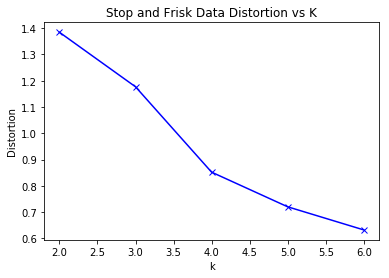

In [22]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
# k means determine k
distortionsSethData = []
K = [2,3,4,5,6]
for k in K:
    print(k)
    kmeanModel = KMeans(n_clusters=k,init='k-means++').fit(dfnumeric)
    distortionsSethData.append(sum(np.min(cdist(dfnumeric, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dfnumeric.shape[0])

# Plot the elbow
plt.plot(K, distortionsSethData, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Stop and Frisk Data Distortion vs K')
plt.show()